# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## hypothesis computes $h_theta$
def hypothesis(theta, X):
  return X@theta

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
  h = hypothesis(theta, X)
  
  size = X.size(0)
  
  grad = torch.zeros_like(X[0])
  for i, value in enumerate(X):
    grad += (value@theta - y[i]) * value
    
  return grad.unsqueeze(1) / size
    
## cost_func computes
def cost_func(theta, X, y):
  cost_function = 0
  size = X.size()[0]
  h = hypothesis(theta, X)
  
  for i, value in enumerate(h):
    cost_function += (value - y[i]) ** 2
  return cost_function * 1/(2*size)

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

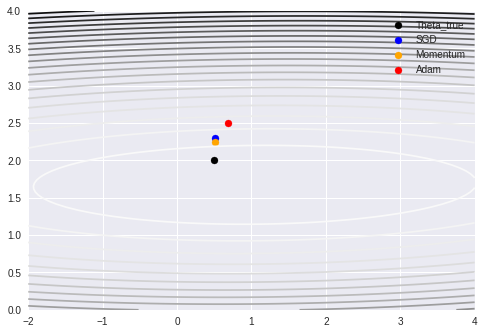

In [25]:
## The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(count, X, y, learning_rate, b1, b2, theta):
    V_dw = 0
    S_dw = 0
    for i in range(1, count+1):
      grad = grad_cost_func(theta, X, y)
      
      V_dw = b1 * V_dw + (1 - b1) * grad
      V_dw_corr = V_dw / (1 - b1**i)
      
      S_dw = b2 * S_dw + (1 - b2) * (grad**2)
      S_dw_corr = S_dw / (1 - b2**i)
      
      theta = theta - learning_rate * V_dw_corr / torch.sqrt(S_dw_corr + 0.00001)
    
    return theta
    

## The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(count, X, y, learning_rate, b, theta):
    last_v = 0
    
    for i in range(count):
      last_v = (b * last_v + (1-b) * grad_cost_func(theta, X, y))
      theta = theta - learning_rate * last_v  / (1-b**(i+1))
      
    return theta

## The weight updated computed using SGD
def weigthupdate_sgd(count, X, y, learning_rate, theta):
    for i in range(count):
      theta = theta - learning_rate * grad_cost_func(theta, X, y)
    
    return theta

  
N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) #initialise

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.

theta1 = weigthupdate_sgd(N, X, y, alpha, theta_0)
theta2 = weightupdate_sgd_momentum(N, X, y, alpha, beta_1, theta_0)
theta3 = weightupdate_adam(N, X, y, alpha, beta_1, beta_2, theta_0)

theta_0_vals = np.linspace(-2,4,100)
theta_1_vals = np.linspace(0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

# Compute the value of the cost function, J, over all the thetas in order to plot the contour below.
J = np.zeros((100, 100))

# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
for i, t1 in enumerate(theta_0_vals):
  for j, t2 in enumerate(theta_1_vals):
    theta = np.array([t1, t2])
    theta = torch.from_numpy(theta).float()
    J[i][j] = cost_func(theta, X, y)[0].numpy()

xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)

# Now plot the output of SGD, momentum and Adam all on the same plot for comparison
plt.scatter(theta_true[0], theta_true[1], color='k', label='Theta_true')
plt.scatter(theta1[0], theta1[1], color='b', label='SGD')
plt.scatter(theta2[0], theta2[1], color='orange', label='Momentum')
plt.scatter(theta3[0], theta3[1], color='r', label='Adam')
plt.legend(loc = 'best')